In [3]:
from elastemp_pd.enthalpy.enthalpy_calc import make_zero_enthalpy, get_zero_enthalpy
from elastemp_pd.dynamic.dynamic_calc import make_phonon
from elastemp_pd.dynamic.dynamic_calc import get_phonon
from elastemp_pd.thermal.thermal_calc import get_thermal
from elastemp_pd.thermal.metastable import get_metastable
import pandas as pd, os

# Make the folders to run static enthalpy calculations using VASP

This command takes structures in the form of POSCAR-* in the root directory('POSCARS' here) and creates folders where vasp needs to be run. 
The k-point density can be changed to generate tighter or looser k-point grids. The minimum pressure, maximum pressure and num of pressure points in between
can be altered by the user. A default INCAR file is provided if not given in the home directory(needs to be called INCAR_static). For most cases, the default INCAR works well. A potential file in the form of POTCAR needs to be given by user. Else program won't run. A copy of list of files to be run is stored in the output/preprocessing directory as filelist_enthalpy.csv

In [9]:
make_zero_enthalpy(root_dir = 'POSCARS', kptdensity=6000, p_min = 0, p_max = 100, num_p=4)

Making input files and folder for structure with POSCAR id 1
Making input files and folder for structure with POSCAR id 2
Making input files and folder for structure with POSCAR id 0


# Get the zero temp enthalpy of the structures

Extracts the energy from each folder and calculates the energy/per_atom and stores it in the file ZPE.txt in each Calc/Structure-/P- folder.

In [10]:
get_zero_enthalpy()

Calculation of energy in folder Calcs/Structure-1/P-0 successful. Please check ZPE.txt for zero point enthalpy
Calculation of energy in folder Calcs/Structure-1/P-25 successful. Please check ZPE.txt for zero point enthalpy
Calculation of energy in folder Calcs/Structure-1/P-50 successful. Please check ZPE.txt for zero point enthalpy
Calculation of energy in folder Calcs/Structure-1/P-75 successful. Please check ZPE.txt for zero point enthalpy
Calculation of energy in folder Calcs/Structure-1/P-100 successful. Please check ZPE.txt for zero point enthalpy
Calculation of energy in folder Calcs/Structure-2/P-0 successful. Please check ZPE.txt for zero point enthalpy
Calculation of energy in folder Calcs/Structure-2/P-25 successful. Please check ZPE.txt for zero point enthalpy
Calculation of energy in folder Calcs/Structure-2/P-50 successful. Please check ZPE.txt for zero point enthalpy
Calculation of energy in folder Calcs/Structure-2/P-75 successful. Please check ZPE.txt for zero point en

# Make supercells for phonon calculation

This command generates supercells and creates folders where vasp needs to be run. Supercell dimension needs to be input in the form of a three dim list such as [2,2,2]. 
The k-point density can be changed to generate tighter or looser k-point grids. Since the size of cell is now bigger, a lower k pt grid is generally sufficient. 
 A default INCAR file is provided if not given in the home directory (needs to be called INCAR_dynamic). For most cases, the default INCAR works well.A copy of list of files to be run is stored in the output/preprocessing directory as filelist_dynamic.csv
 

In [11]:
make_phonon(dim=[2,2,2], kptdensity=500)

/pscratch/sd/k/karthb/elastemp-pd_v2/elastemp_pd/dynamic/dynamic_calc.py:27: UserWarning: Unable to read INCAR_dynamic file. A default file will be added.
  warnings.warn("Unable to read INCAR_dynamic file. A default file will be added.")
/pscratch/sd/k/karthb/elastemp-pd_v2/elastemp_pd/dynamic/dynamic_calc.py:28: UserWarning: For most cases, default file is good. For best results, tailor the INCAR file in Phonon_calculations folder
  warnings.warn("For most cases, default file is good. For best results, tailor the INCAR file in Phonon_calculations folder")
/pscratch/sd/k/karthb/elastemp-pd_v2/elastemp_pd/dynamic/dynamic_calc.py:53: UserWarning: Minor symmetry breakings in CONTCAR file can cause large phonon calculations because of calculated asymmetry. Please manually adjust POSCAR file in Phonon calculations folder
  warnings.warn('Minor symmetry breakings in CONTCAR file can cause large phonon calculations because of calculated asymmetry. Please manually adjust POSCAR file in Phonon

        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                            |_|    |___/
                                      2.20.0

Python version 3.9.7
Spglib version 2.0.2

Crystal structure was read from "POSCAR-unitcell".
Unit of length: angstrom
Displacements creation mode
Settings:
  Supercell: [2 2 2]
Spacegroup: P6_3/mmc (194)
Use -v option to watch primitive cell, unit cell, and supercell structures.

"phonopy_disp.yaml" and supercells have been created.

Summary of calculation was written in "phonopy_disp.yaml".
                 _
   ___ _ __   __| |
  / _ \ '_ \ / _` |
 |  __/ | | | (_| |
  \___|_| |_|\__,_|

        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                       

# Calculate force constants from phonon calculation

Extracts the force constants for each phonon calculation which is needed for quasi-harmonic approximation

In [12]:
os.getcwd()

'/pscratch/sd/k/karthb/elastemp-pd_v2'

In [13]:
get_phonon()
   


Extracting force constants in folder /pscratch/sd/k/karthb/elastemp-pd_v2/Calcs/Structure-1/P-0/Phonon_calculation
        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                            |_|    |___/
                                      2.20.0

Python version 3.9.7
Spglib version 2.0.2

FORCE_CONSTANTS has been created from vasprun.xml.
Atom types: C
                 _
   ___ _ __   __| |
  / _ \ '_ \ / _` |
 |  __/ | | | (_| |
  \___|_| |_|\__,_|

Extracting force constants in folder /pscratch/sd/k/karthb/elastemp-pd_v2/Calcs/Structure-1/P-25/Phonon_calculation
        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                            |_|    |___/
                                      2

# Calculate quasi-harmonic energies for each structure-pressure combination

This command calculates the quasi-harmonic energies in each structure-p folder. The input parameters are the supercell dimension, minimum temperature and maximum temperature between which quasi-harmonic approximation is done with the interval period of t_step. Usually 10 K is sufficient as t_step. Going further below will cause computational time to increase significantly. If make_plots is set as true, relative stability curves (ie G vs T for all phases) at different pressures are computed and plotted in output/results folder

Extracting thermal-phonon information in folder /pscratch/sd/k/karthb/elastemp-pd_v2/Calcs/Structure-1/P-0/Phonon_calculation
        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                            |_|    |___/
                                      2.20.0

Python version 3.9.7
Spglib version 2.0.2

"mesh.conf" was read as phonopy configuration file.
Crystal structure was read from "POSCAR-unitcell".
Unit of length: angstrom
Mesh sampling mode
Settings:
  Sampling mesh: [48 48 48]
  Supercell: [2 2 2]
Spacegroup: P6_3/mmc (194)
Use -v option to watch primitive cell, unit cell, and supercell structures.

Force constants are read from "FORCE_CONSTANTS".
Force constants format was transformed to compact format.
Array shape of force constants: (4, 32, 3, 3)

Mesh numbers: [48 48 48]
Number of irreducible q-points on sampling mesh: 14400/110

/pscratch/sd/k/karthb/elastemp-pd_v2/elastemp_pd/thermal/thermal_calc.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pressure['e_min'] = e_min
/pscratch/sd/k/karthb/elastemp-pd_v2/elastemp_pd/thermal/thermal_calc.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pressure['stable_struct'] = stable_struct
/pscratch/sd/k/karthb/elastemp-pd_v2/elastemp_pd/thermal/thermal_calc.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

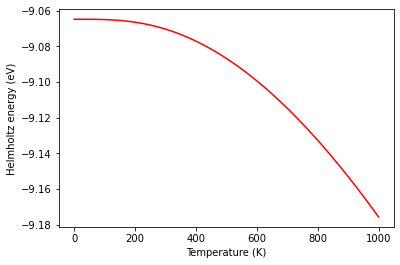

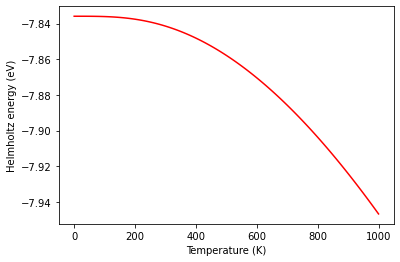

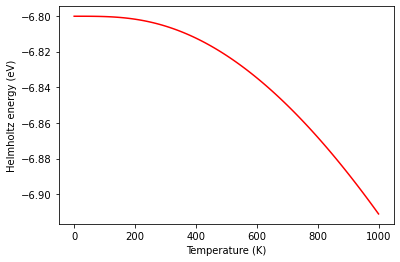

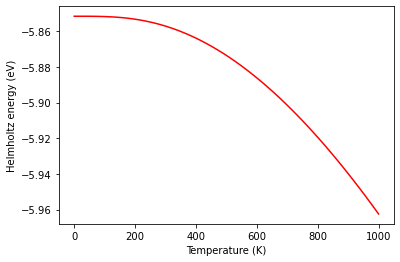

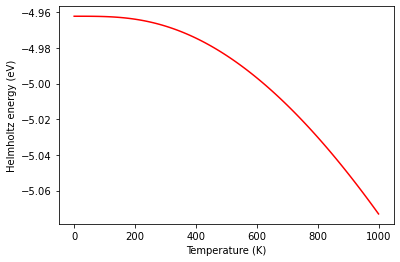

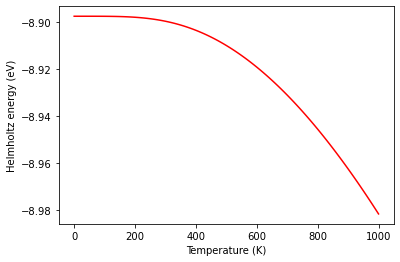

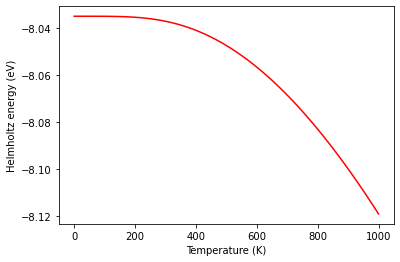

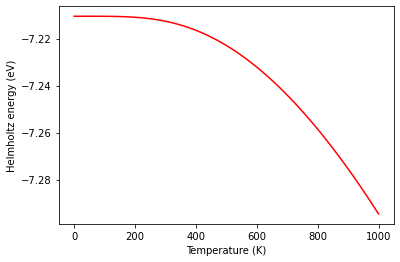

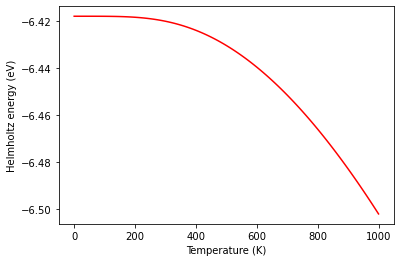

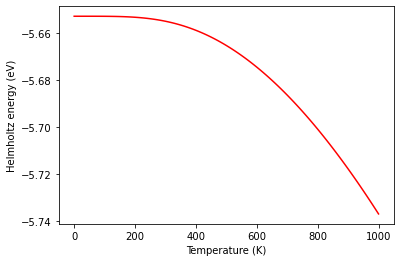

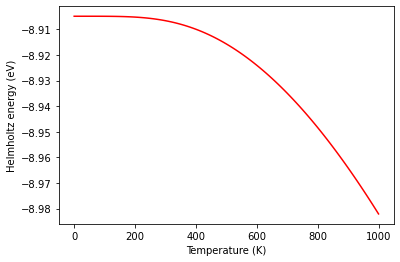

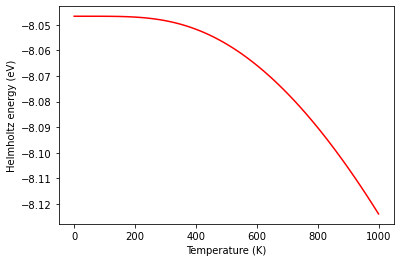

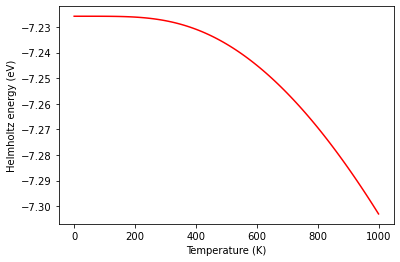

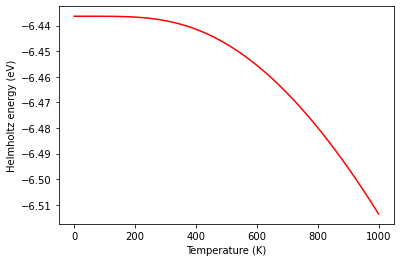

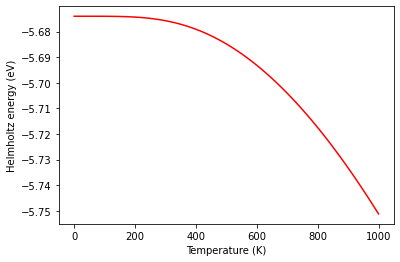

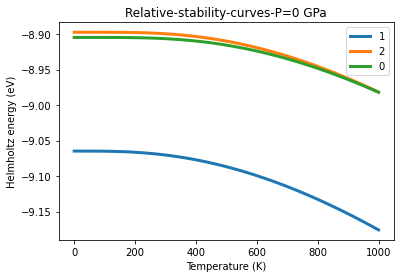

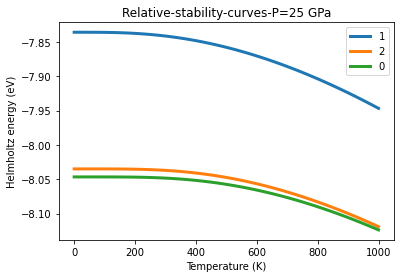

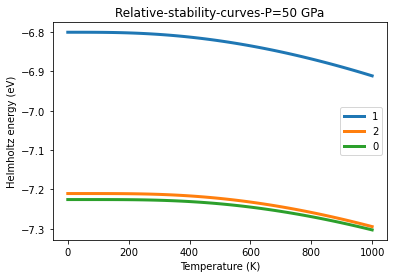

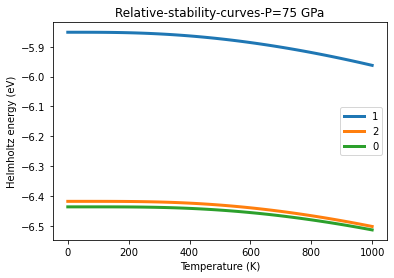

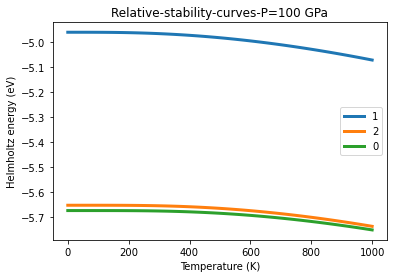

In [14]:
get_thermal(dim=[2,2,2], t_min=0, t_max = 1000, t_step=10, make_plots=True)
    

# Get metastable slices at different dG intervals

This will extract metastable slices at different dG intervals. The input parameters are g_min, g_max ie the range of energy values of metastablitiy. The number of slices in between them is given as num_g. if num_g is 2, slices are calculated at dG = 0, dg = 0.2, dg = 0.4 from ground state. 

This is a 3 step process:
    1. From the P-T data of all phases, energy is intrapolated for all pressures from p_min to p_max at intervals of 1 GPa. 
    2. From the extra polated data, the stable phase at each P-T condition is extracted for each dG. 
    3. From the raw data of the stable phases at each P-T, 4 classifiers- logistic regression, random forest, Naive bayes and SVM classifiers are fit
       to plot decision boundaries. 
For best results, manual intervention needs to be made with domain knowledge. The plots will be saved in output/results. Note that the plots will be saved in the format dG = energy (in meV) ie dG = 0.02 eV/atom will correspond to plots with dG = 20

Extrapolating each structure energies at each temperature across different pressures
Extracting metastable slices at dg = 0.0 eV/atom from ground state
Slices will be output/results dir
Extracting metastable slices at dg = 0.02 eV/atom from ground state
Slices will be output/results dir
Extracting metastable slices at dg = 0.04 eV/atom from ground state
Slices will be output/results dir


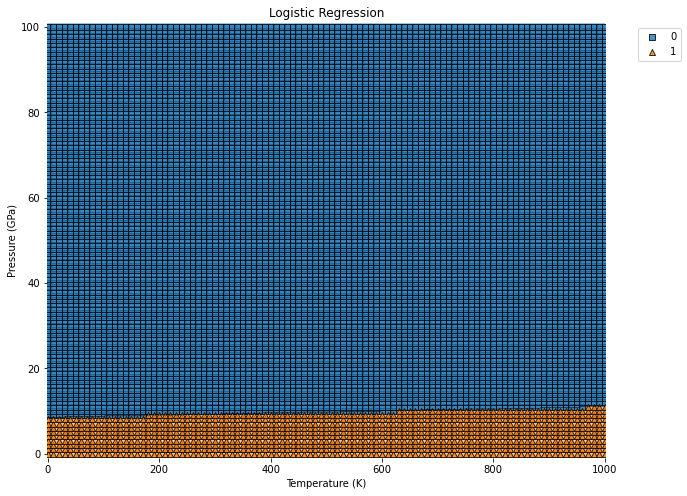

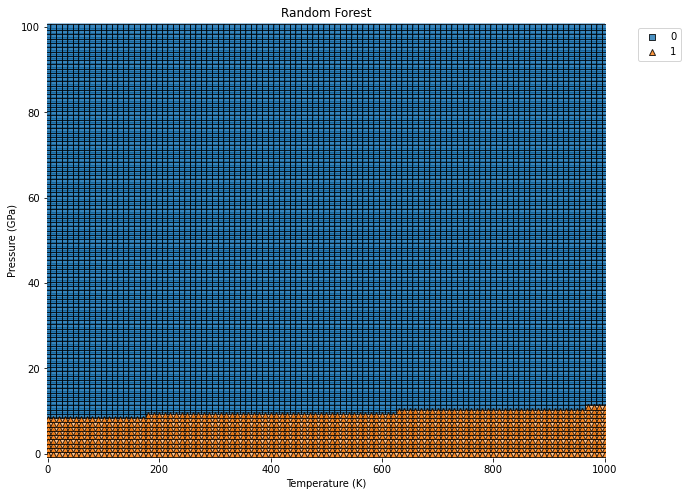

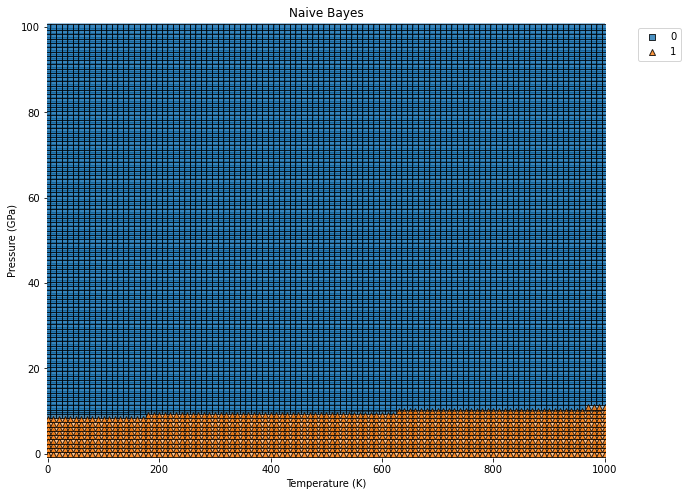

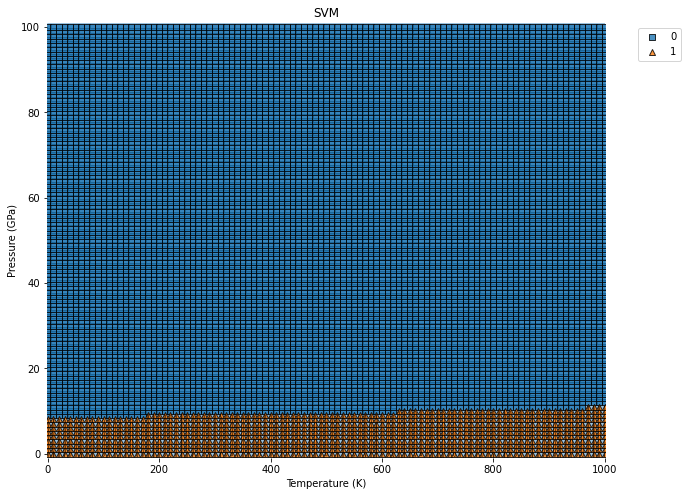

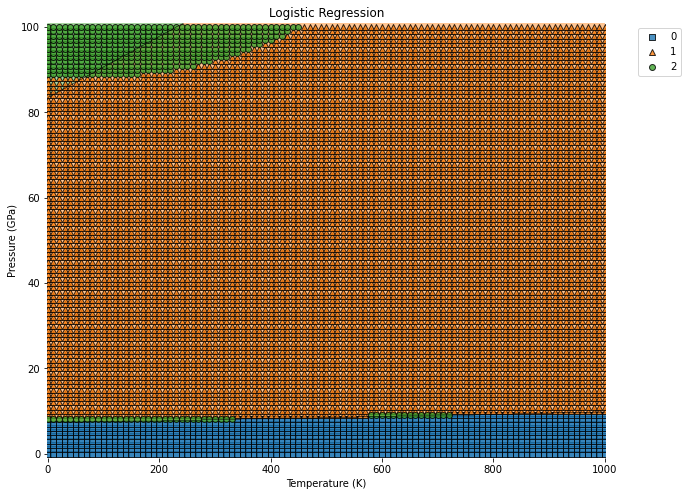

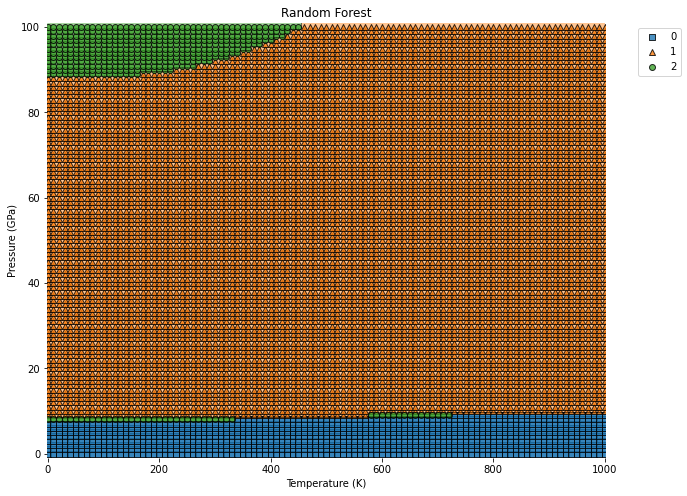

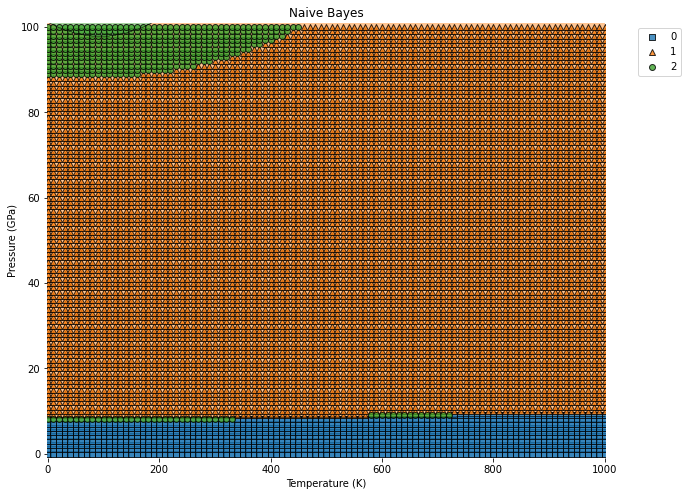

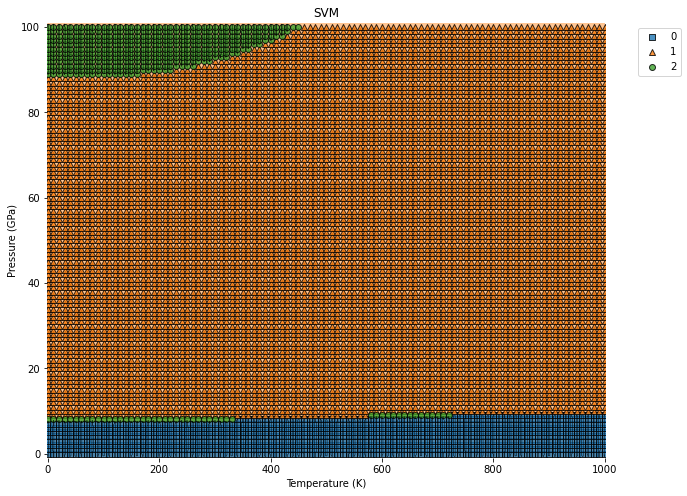

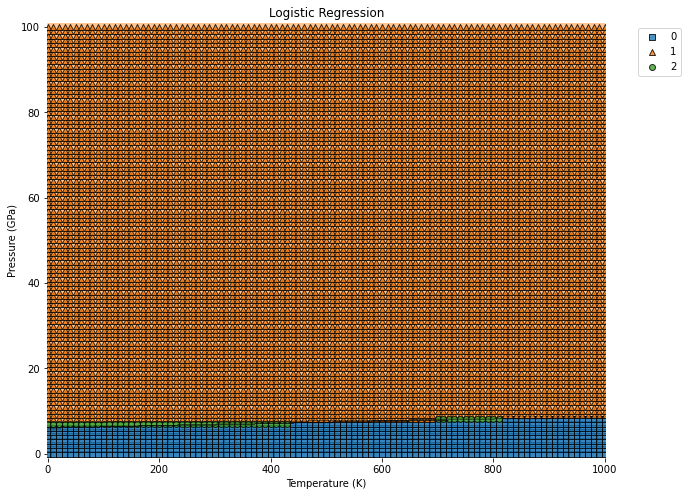

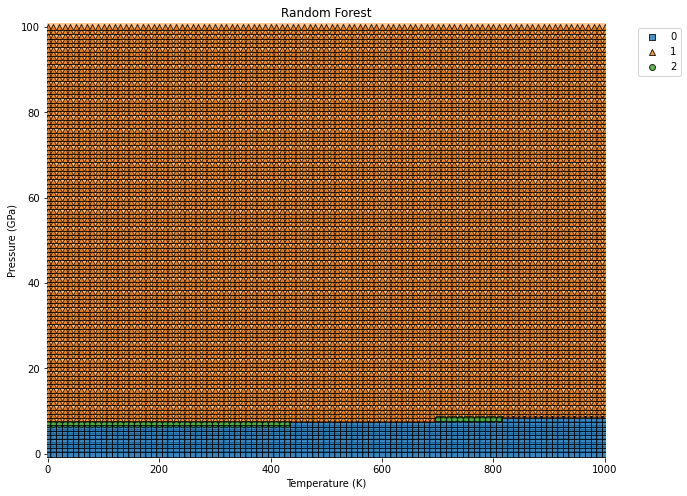

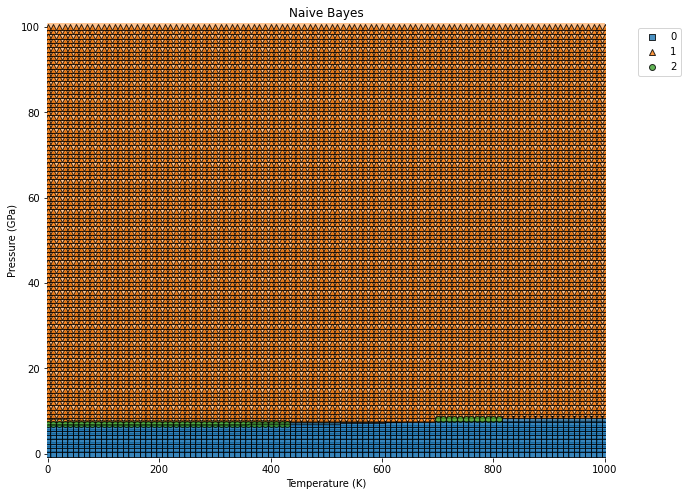

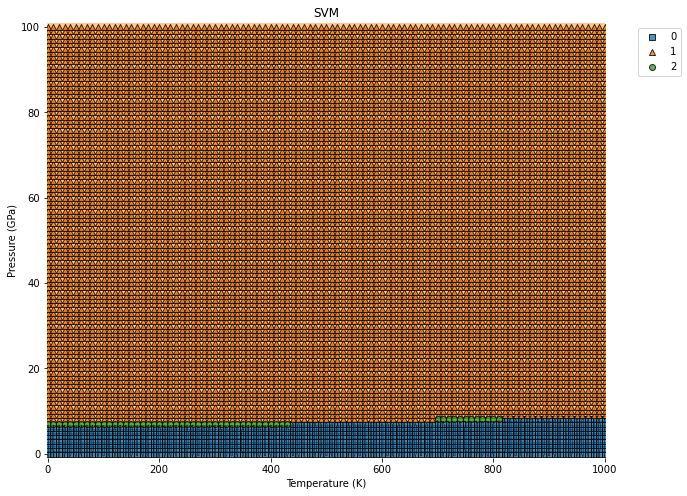

In [17]:
get_metastable(g_min=0,g_max=0.04,num_g=2)